# Mushroom Classification

Dataset for this project was taken from the UCI Data Repository  
https://archive.ics.uci.edu/ml/datasets/mushroom

---
### Data Description:  

     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d

### Import the Data

Import the UCI repository into a __DataFrame__

In [1]:
import pandas as pd

categories = ['class','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing',
              'gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring',
              'stalk-surface-below-ring', 'stalk-color-above-ring','stalk-color-below-ring','veil-type',
              'veil-color','ring-number','ring-type','spore-print-color','population','habitat']
attributes = categories[1:]
classifier = categories[0]

Mushroom = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header=None)
Mushroom.columns = categories
Mushroom.to_csv('Mushroom.csv')

### Data Summary

The __descirbe()__ function can give us a summary of our dataframe:
    count: number of responses  
    unique: number of unique values     
    top: most frequently occurring value     
    freq: frequency of the top value

In [2]:
Mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### Dataframe Info

The __info()__ function tells us about our fields / categories:

In [3]:
Mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### We can look at the frequency of each value for any attribute using __value_counts()__

In [4]:
Mushroom['cap-shape'].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

### Data Manipulation

Unlike the previous project we did with the wine quality dataset, the values for this data are non-numerical.  
This means we'll have to convert our values to ordinal (numerical) to make them machine-readable.
Before we can do that we'll need to change our data types.  
When we ran the info() function, we saw that the data type for all of our categories was 'object'.  
We'll want to change this to 'category'.


In [5]:
Mushroom = Mushroom.astype('category')
Mushroom.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

### Label Ecnoder

We can use the Label Encoder in Scikit-Learn to convert our category values into ordinal

In [6]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
for column in Mushroom.columns:
    Mushroom[column] = labelencoder.fit_transform(Mushroom[column])

Mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


If we look at our dataframe description above, we see that veil type has one unique value. We can safely remove it since it has no effect on our outcome.

In [7]:
# for axis, 1 = column, 0 = row
Mushroom = Mushroom.drop(['veil-type'],axis=1)
attributes.remove('veil-type') # remove from attributes list as well so we can call it later

### Splitting the Data

Now let's split our data up into a training and testing set

In [8]:
from sklearn.model_selection import train_test_split

y = Mushroom['class']
X = Mushroom[attributes]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4) #training set size = 1-test_size

### Train the Model

In [9]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier ?
clf=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

### Evaluate the Model

In [10]:
from sklearn import metrics

print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)*100}%")

Accuracy: 100.0%


### What Drives the Model?

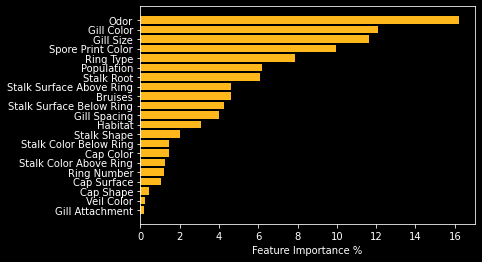

In [40]:
import pandas as pd
from matplotlib import pyplot as plt

feature_imp = pd.Series(clf.feature_importances_, index=attributes).sort_values(ascending=True)

plt.style.use('dark_background')
#plt.lines(color='white')
plt.barh([key.replace('-',' ').title() for key in feature_imp.index], [value*100 for value in feature_imp.values], color='#ffb81c')
plt.xlabel('Feature Importance %')
plt.show()